TH1:  Upsampling, Scale: Thử với logistic
và TH2:  Không Upsampling, Ko scale: thử với XgBoost

# Setup

In [2]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
#from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

# Đọc dữ liệu

In [6]:
customer_data = pd.read_csv("C:/Users/ADMIN/Desktop/Đồ án/DATN/train.csv")

In [7]:
customer_data.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
object_cols = [f for f in customer_data.columns if customer_data[f].dtype =="O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


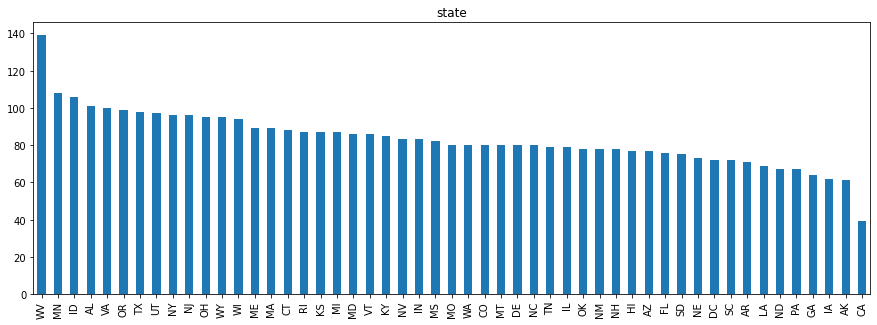

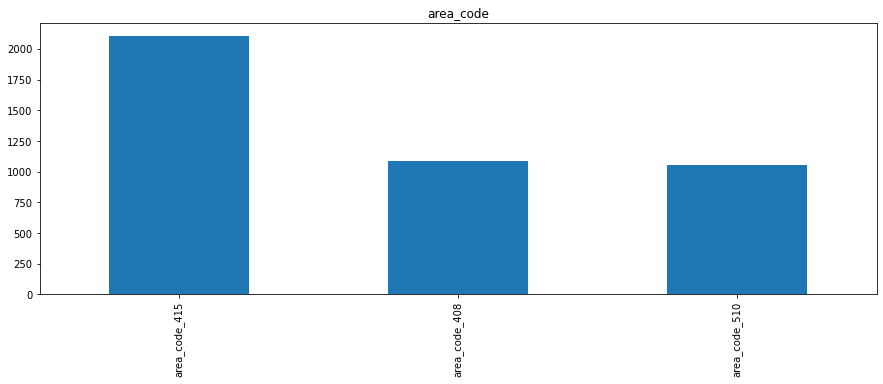

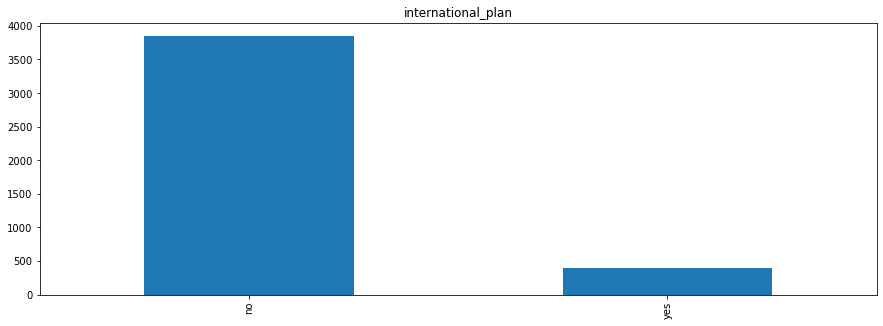

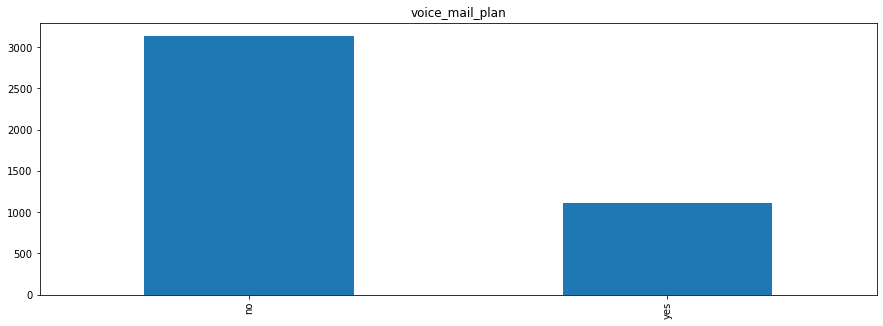

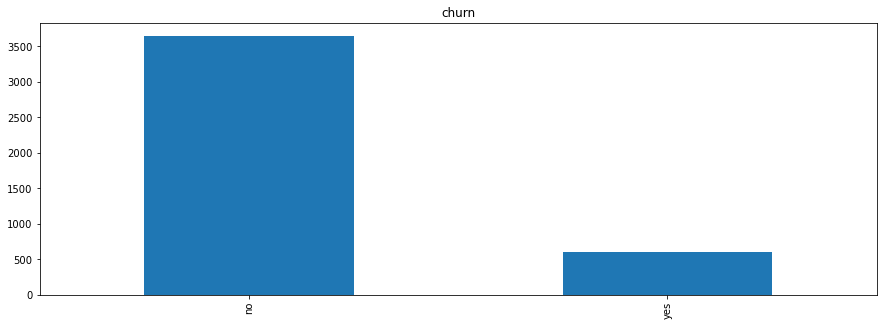

In [10]:

for col in object_cols:
  customer_data[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [11]:
numeric_cols = [f for f in customer_data.columns if customer_data[f].dtype !="O"]
print(numeric_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


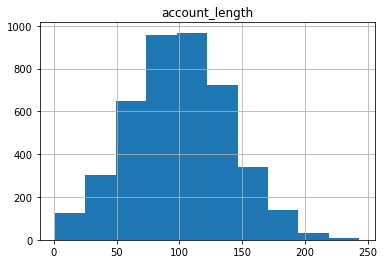

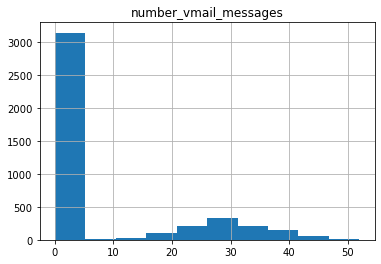

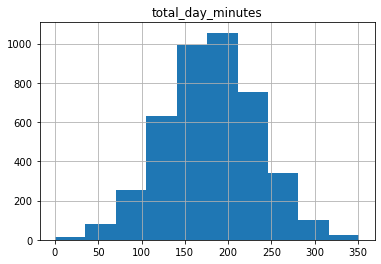

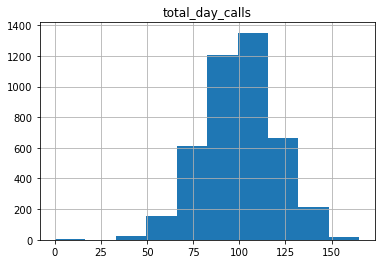

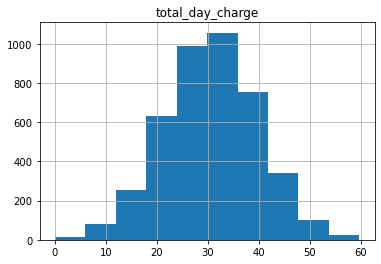

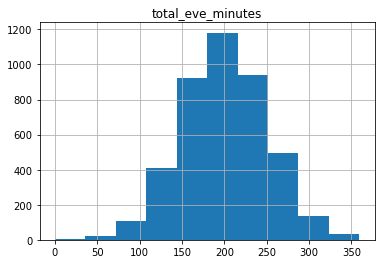

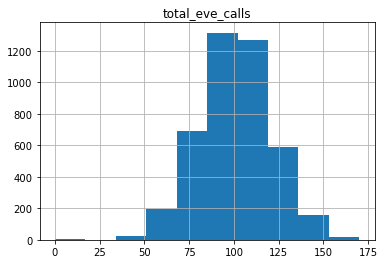

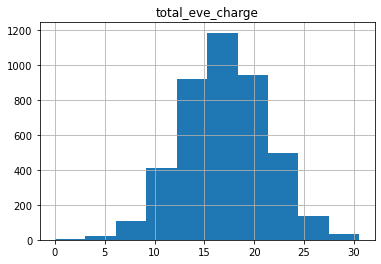

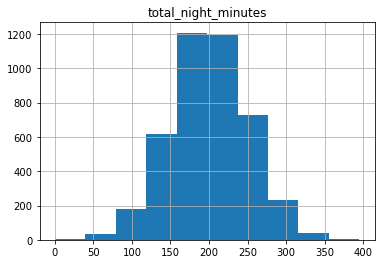

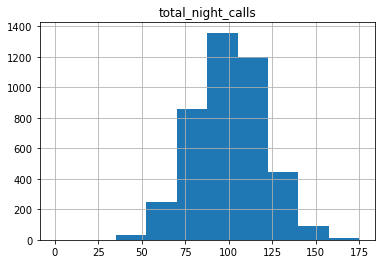

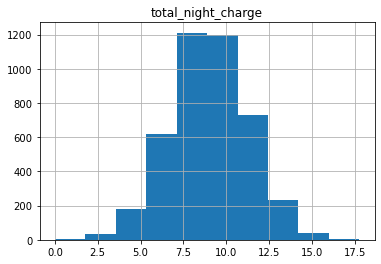

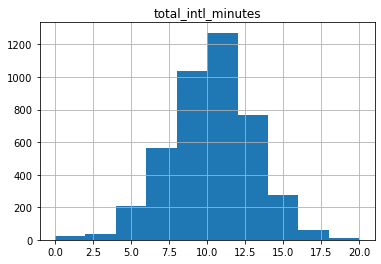

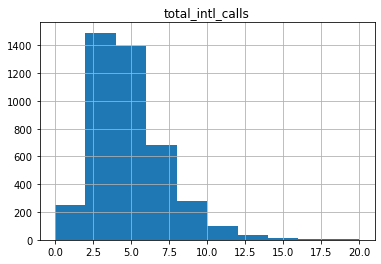

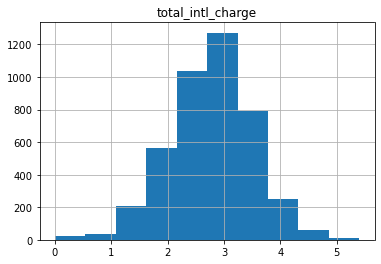

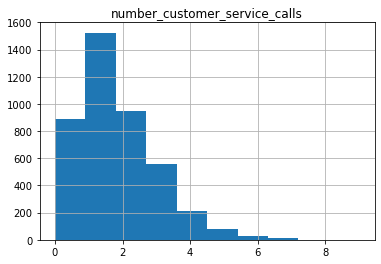

In [12]:
for col in numeric_cols:
  customer_data[col].hist()
  plt.title(col)
  plt.show()

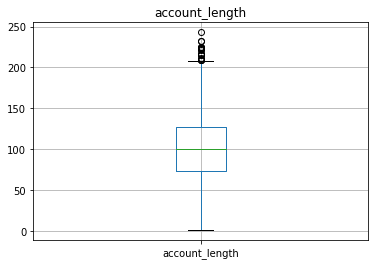

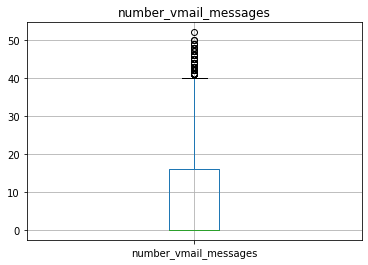

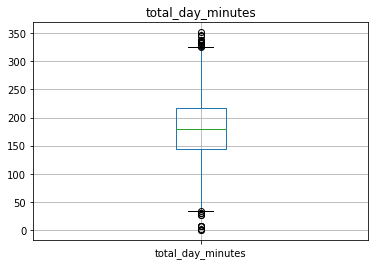

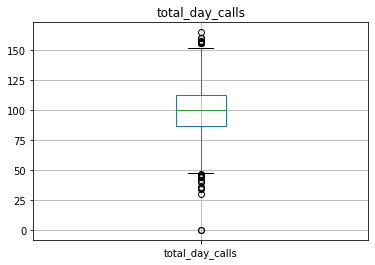

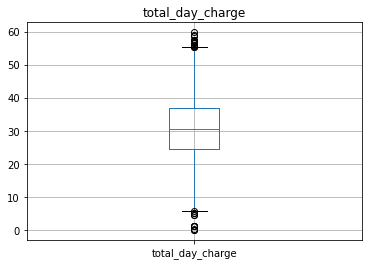

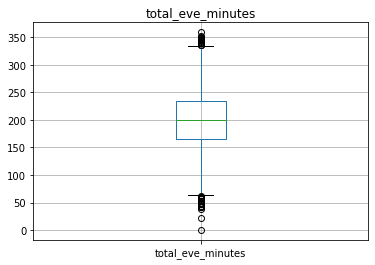

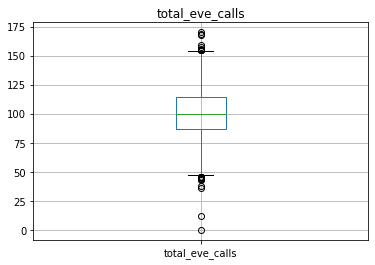

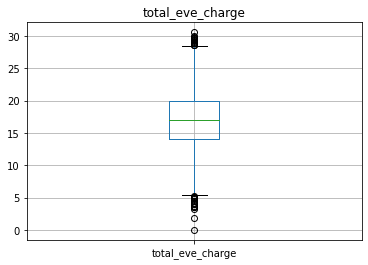

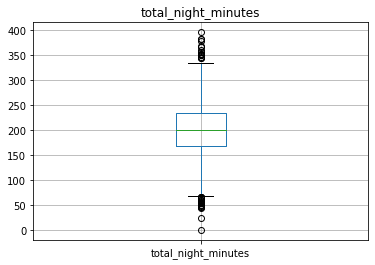

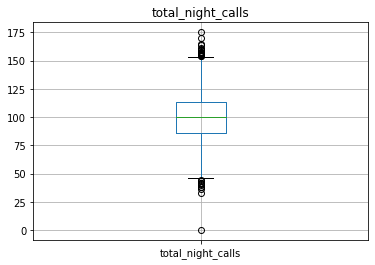

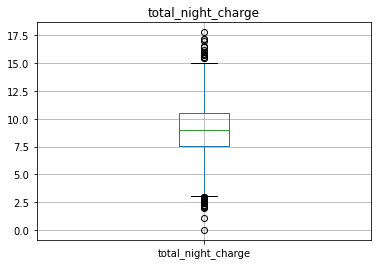

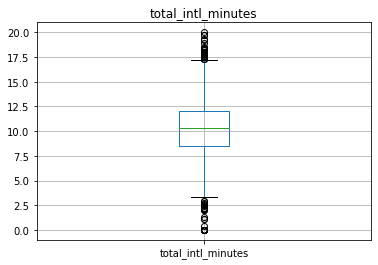

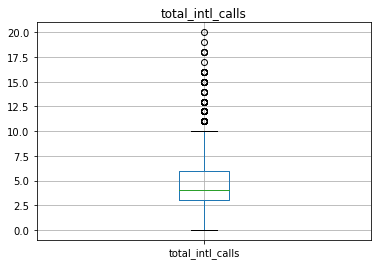

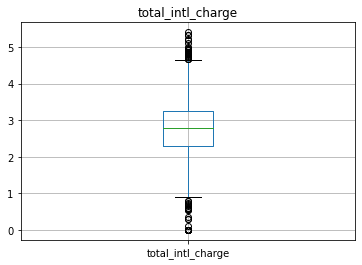

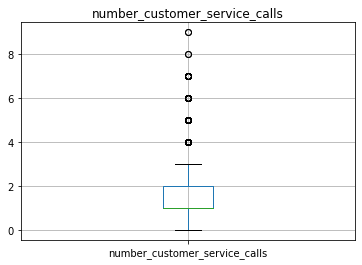

In [13]:

for col in numeric_cols:
  customer_data.boxplot(column=[col])
  plt.title(col)
  plt.show()

# Tiền xử lý dữ liệu để đưa vào model

In [14]:

dataset = customer_data.copy()

In [15]:
he = ce.HashingEncoder(cols='state')
dataset_hash = he.fit_transform(dataset)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [16]:
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,0,0,1,0,0
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,1,0,1,0,0
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9.62,10.3,6,2.78,0,1,0,0,0,0
4246,0,0,0,0,0,0,1,0,73,0,...,8.38,11.5,6,3.11,3,0,0,0,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,5.81,6.9,7,1.86,1,0,0,0,0,0
4248,0,0,0,0,0,0,1,0,50,40,...,13.39,9.9,5,2.67,2,0,0,0,1,0


In [17]:
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.00,-0.20,-0.13,-0.15,-0.19,-0.11,-0.20,-0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.04,0.00,-0.00,-0.02,-0.00,-0.00,0.02,-0.00,-0.01,0.01,-0.02,-0.00,-0.01,-0.04
col_1,-0.20,1.00,-0.13,-0.16,-0.20,-0.11,-0.20,-0.15,-0.00,-0.02,0.03,0.02,0.03,-0.00,0.00,-0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.02,0.01,-0.01,-0.01,-0.02,0.04
col_2,-0.13,-0.13,1.00,-0.10,-0.13,-0.07,-0.13,-0.09,-0.00,-0.03,-0.02,-0.01,-0.02,0.03,-0.04,0.03,-0.00,0.00,-0.00,0.00,0.02,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01
col_3,-0.15,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.01,0.03,-0.01,0.02,-0.01,0.02,0.00,0.02,0.02,0.02,0.02,-0.00,-0.02,-0.00,0.01,0.02,-0.01,0.01,0.03,-0.01
col_4,-0.19,-0.20,-0.13,-0.16,1.00,-0.11,-0.20,-0.14,0.01,0.01,0.03,-0.00,0.03,0.01,0.01,0.01,0.03,-0.01,0.03,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,0.02,0.00,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.00,0.02,-0.02,-0.00,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.00,-0.03,-0.00,0.01,-0.00,0.01,0.01,0.02,0.03
col_6,-0.20,-0.20,-0.13,-0.16,-0.20,-0.11,1.00,-0.15,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,-0.03,-0.05,-0.02,0.01,-0.02,0.03,0.02,0.03,-0.00,0.00,0.01,-0.02,0.00,-0.03
col_7,-0.14,-0.15,-0.09,-0.12,-0.14,-0.08,-0.15,1.00,-0.02,-0.00,-0.02,-0.01,-0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.02,0.03,0.01,0.01,-0.02
account_length,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.02,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.02,0.03,0.00,0.02
number_vmail_messages,-0.01,-0.02,-0.03,0.03,0.01,0.02,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.01,-0.01,0.00,0.95,-0.10


In [18]:
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


# TH1: Upsampling = SMOTE, Scale = MINMAX và thử với Logistic

In [19]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

In [20]:

# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model_log, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       721
           1       0.55      0.32      0.40       129

    accuracy                           0.86       850
   macro avg       0.72      0.64      0.66       850
weighted avg       0.83      0.86      0.84       850



NameError: name 'plot_confusion_matrix' is not defined

# XGBOOST

In [21]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)


In [22]:
# XGBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
# In bao cao ket qua
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.93      0.83      0.88       129

    accuracy                           0.96       850
   macro avg       0.95      0.91      0.93       850
weighted avg       0.96      0.96      0.96       850



NameError: name 'plot_confusion_matrix' is not defined